<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 166.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 208.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 133.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 146.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 145.5 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Identify and manage missing values in critical columns such as Employment, JobSat, and RemoteWork. Implement a strategy to fill or drop these values, depending on the significance of the missing data from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

import pandas as pd

df = pd.read_csv('survey-data.csv')

# Identify missing values in critical columns
missing_employment = df['Employment'].isnull().sum()
missing_jobsat = df['JobSat'].isnull().sum()
missing_remotework = df['RemoteWork'].isnull().sum()

print(f"Missing values in 'Employment': {missing_employment}")
print(f"Missing values in 'JobSat': {missing_jobsat}")
print(f"Missing values in 'RemoteWork': {missing_remotework}")

# Strategy for managing missing values:
# Option 1: Drop rows with missing values in these critical columns
# This is suitable if the number of missing values is relatively small
# df.dropna(subset=['Employment', 'JobSat', 'RemoteWork'], inplace=True)
# print("Rows with missing values in critical columns have been dropped.")

# Option 2: Fill missing values with a placeholder or the mode
# This is suitable if the number of missing values is significant and dropping them would lose too much data
# Fill 'Employment' with the mode (most frequent value)
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)

# Fill 'JobSat' with a placeholder like 'Unknown' (or the mode/median for numerical data)
df['JobSat'].fillna('Unknown', inplace=True)

# Fill 'RemoteWork' with the mode
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)

print("\nMissing values in critical columns after filling:")
print(f"Missing values in 'Employment': {df['Employment'].isnull().sum()}")
print(f"Missing values in 'JobSat': {df['JobSat'].isnull().sum()}")
print(f"Missing values in 'RemoteWork': {df['RemoteWork'].isnull().sum()}")

# Display the first few rows to see the changes
print("\nDataFrame after managing missing values:")
print(df.head())


--2025-06-02 08:09:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  75.7MB/s    in 2.0s    

2025-06-02 08:09:13 (75.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]

Missing values in 'Employment': 0
Missing values in 'JobSat': 36311
Missing values in 'RemoteWork': 10631

Missing values in critical columns after filling:
Missing values in 'Employment': 0
Missing values in 'JobSat': 0
Missing values in 'RemoteWork': 0

DataFrame after managing mis

/tmp/ipykernel_4203/4281373085.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
/tmp/ipykernel_4203/4281373085.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Median Job Satisfaction by Experience Range:
  ExperienceRange  JobSat
0       0-5 years     7.0
1      5-10 years     7.0
2     10-20 years     7.0
3       >20 years     8.0


/tmp/ipykernel_4203/590637967.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
/tmp/ipykernel_4203/590637967.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=median_jobsat_by_experience, palette='viridis')


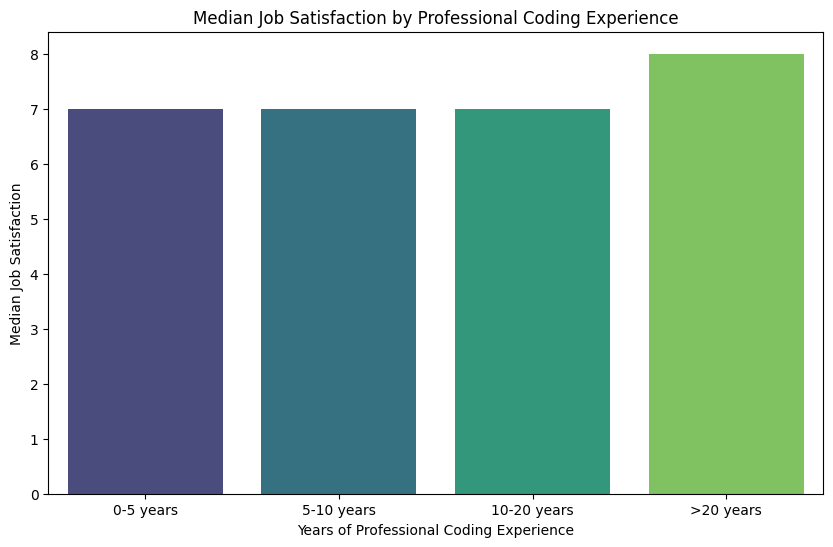


Summary Statistics for YearsCodePro:
count    27568.000000
mean        10.574071
std          8.416643
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: YearsCodePro, dtype: float64


In [4]:
## Write your code here
# Analyze the relationship between years of professional coding experience (YearsCodePro) and job satisfaction (JobSat). Summarize YearsCodePro and calculate median satisfaction scores based on experience ranges.
# Create experience ranges for YearsCodePro (e.g., 0-5, 5-10, 10-20, >20 years).
# Calculate the median JobSat for each range.
# Visualize the relationship using a bar plot or similar visualization. from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')

# Clean and convert 'YearsCodePro' to numeric, coercing errors
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Remove rows where 'YearsCodePro' or 'JobSat' is missing
df.dropna(subset=['YearsCodePro', 'JobSat'], inplace=True)

# Create experience ranges
bins = [0, 5, 10, 20, df['YearsCodePro'].max()]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False, include_lowest=True)

# Calculate median JobSat for each range
median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

print("Median Job Satisfaction by Experience Range:")
print(median_jobsat_by_experience)

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_jobsat_by_experience, palette='viridis')
plt.title('Median Job Satisfaction by Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.show()

# Summarize YearsCodePro
print("\nSummary Statistics for YearsCodePro:")
print(df['YearsCodePro'].describe())


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


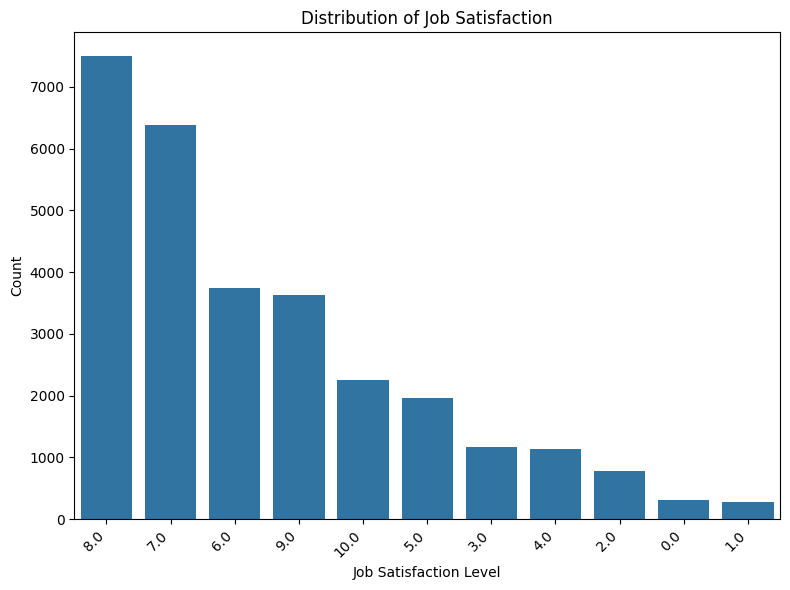

In [5]:
## Write your code here
# Use a count plot to show the distribution of JobSat values. This provides insights into the overall satisfaction levels of respondents. from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(url)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


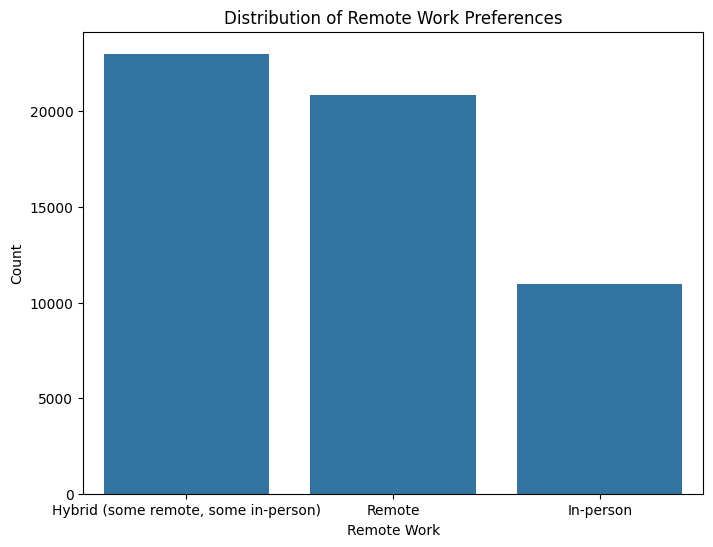

Cross-tabulation of Remote Work by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17281   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but looking fo...                                     2   
Student, full-time;Not emplo

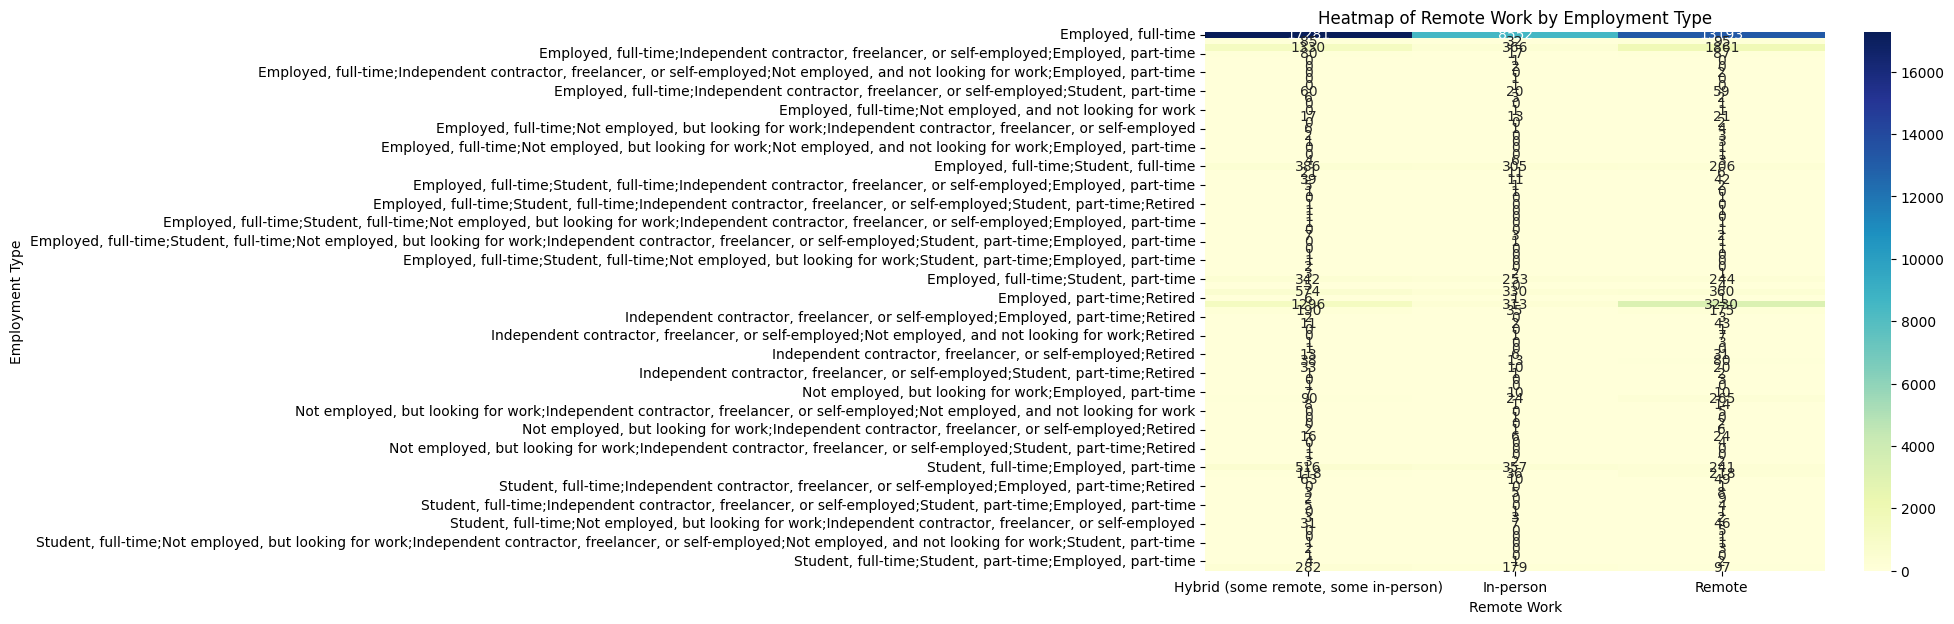

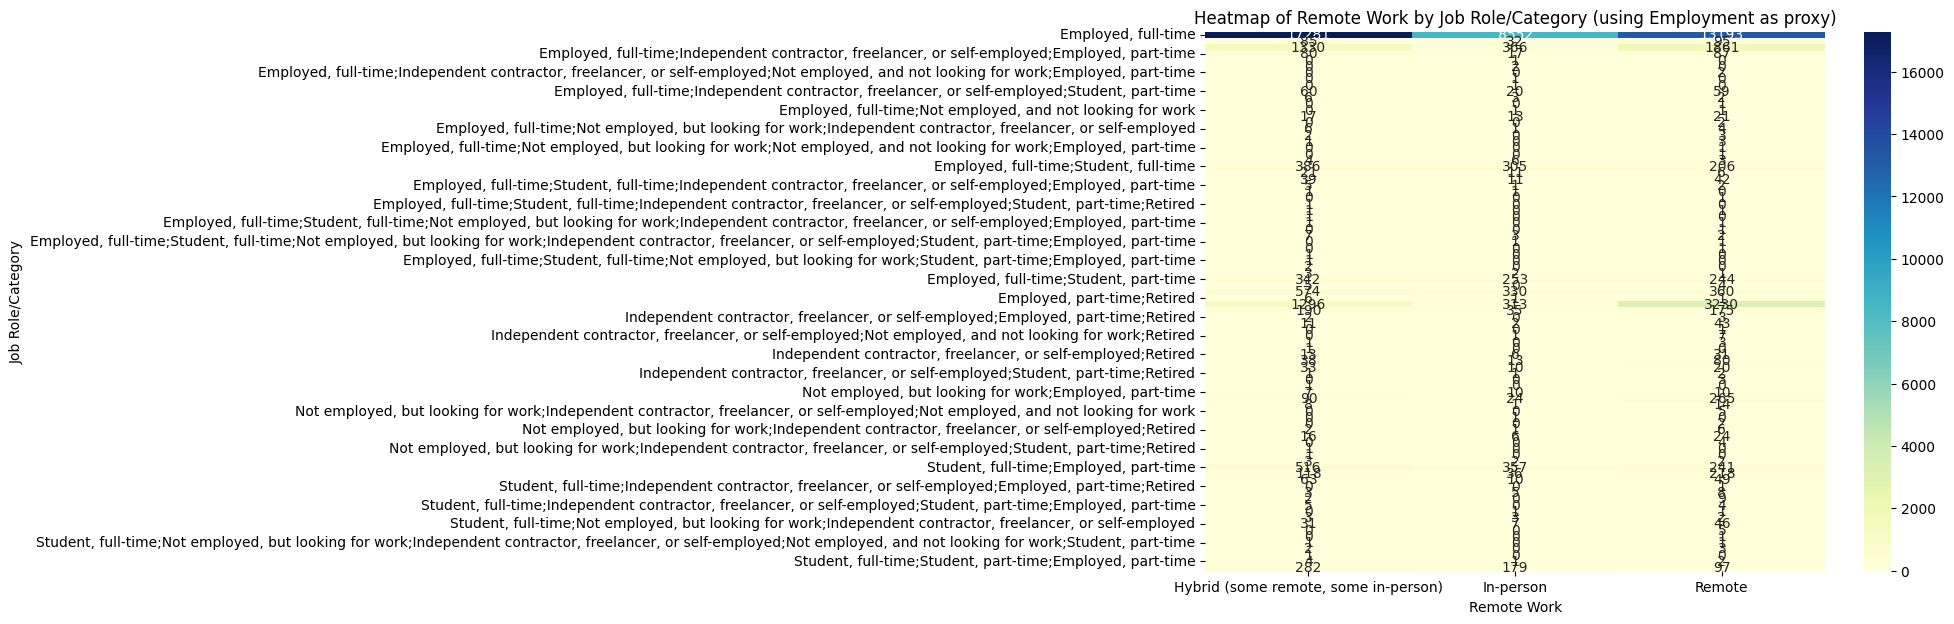

In [8]:
## Write your code here
# Analyze trends in remote work based on job roles. Use the RemoteWork and Employment columns to explore preferences and examine if specific job roles prefer remote work more than others.
# Use a count plot to show remote work distribution.
# Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

# Count plot for remote work distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

# Cross-tabulate remote work preferences by employment type
employment_remote_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'])
print("Cross-tabulation of Remote Work by Employment Type:")
print(employment_remote_crosstab)
print("\n" + "="*50 + "\n")

# Cross-tabulate remote work preferences by job roles (using the 'Role' column if available, otherwise 'Employment' as a proxy)
# Assuming 'Employment' is a proxy for different job roles/categories in this context based on the prompt's example
# If a 'Role' column existed, we would use: job_role_remote_crosstab = pd.crosstab(df['Role'], df['RemoteWork'])
# Since the prompt specifically mentioned 'job roles' but the example used 'Employment', we'll use 'Employment' here.
# If a dedicated 'Role' column is available in the actual data, replace 'Employment' below with 'Role'.
job_role_remote_crosstab = pd.crosstab(df['Employment'], df['RemoteWork']) # Using Employment as a proxy for roles
print("Cross-tabulation of Remote Work by Job Role/Category (using Employment as proxy):")
print(job_role_remote_crosstab)
print("\n" + "="*50 + "\n")

# Optional: Visualize the crosstabs using heatmaps for better understanding
plt.figure(figsize=(10, 7))
sns.heatmap(employment_remote_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Remote Work by Employment Type')
plt.xlabel('Remote Work')
plt.ylabel('Employment Type')
plt.show()

# Optional: Visualize the crosstabs using heatmaps for better understanding
plt.figure(figsize=(10, 7))
sns.heatmap(job_role_remote_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Remote Work by Job Role/Category (using Employment as proxy)')
plt.xlabel('Remote Work')
plt.ylabel('Job Role/Category')
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


--2025-06-02 08:43:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.3MB/s    in 2.5s    

2025-06-02 08:43:48 (60.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]

Top languages in United States of America:
LanguageList
JavaScript                 6849
Python                     6238
SQL                        5766
HTML/CSS                   5754
Bash/Shell (all shells)    4776
Name: count, dtype: int64
--------------------
Top languages in Unit

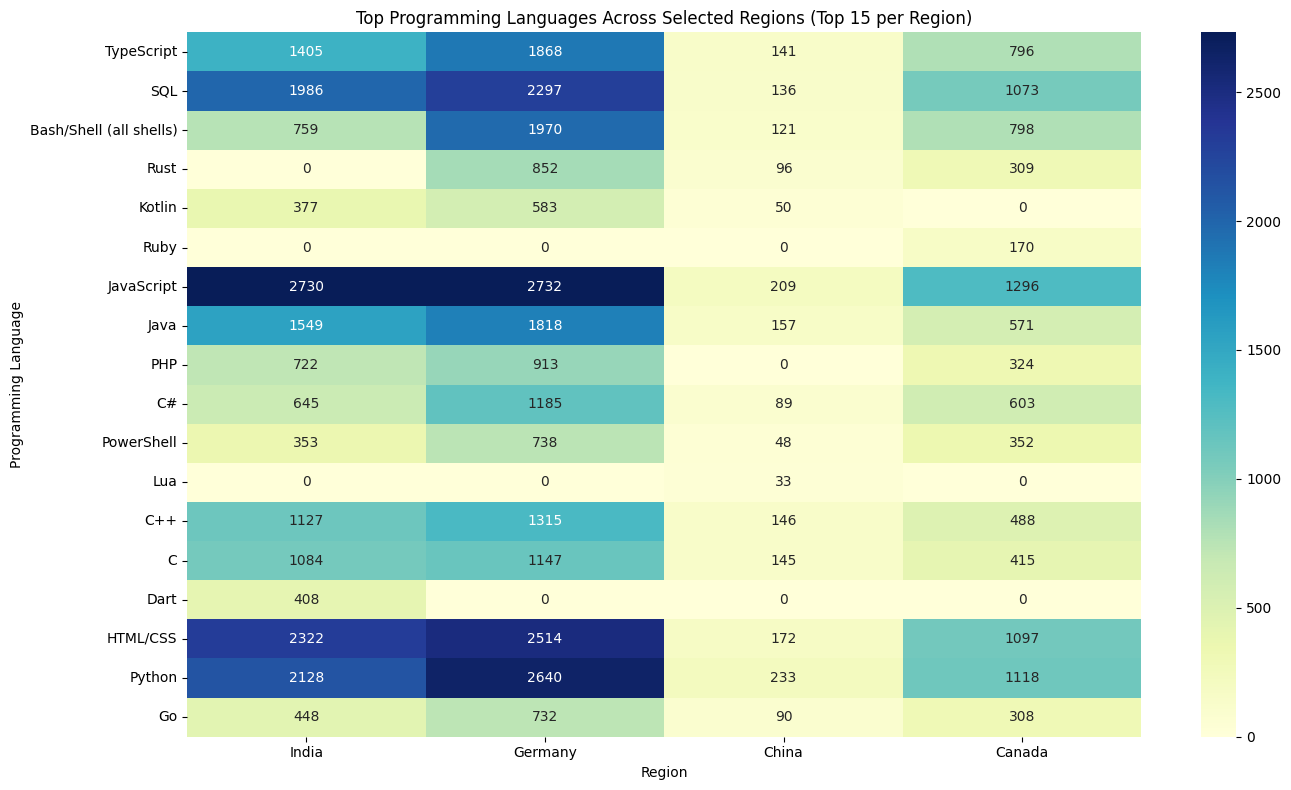

In [3]:
## Write your code here
# Analyze the popularity of programming languages by region. Use the LanguageHaveWorkedWith column to investigate which languages are most used in different regions. Filter data by country or region. Visualize the top programming languages by region with a bar plot or heatmap. from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv -O survey-data.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('survey-data.csv')

# Function to split comma-separated values and create a list
def split_languages(languages_str):
    if isinstance(languages_str, str):
        return [lang.strip() for lang in languages_str.split(';')]
    return []

# Apply the function to the 'LanguageHaveWorkedWith' column
df['LanguageList'] = df['LanguageHaveWorkedWith'].apply(split_languages)

# Explode the DataFrame to have one row per language worked with
df_exploded = df.explode('LanguageList')

# Get a list of unique regions/countries (excluding NaN)
regions = df_exploded['Country'].dropna().unique()

# Dictionary to store language counts per region
language_counts_by_region = {}

# Iterate through each region and count language occurrences
for region in regions:
    df_region = df_exploded[df_exploded['Country'] == region]
    language_counts = df_region['LanguageList'].value_counts()
    language_counts_by_region[region] = language_counts

# Example: Print the top 5 languages for a few regions
for region, counts in list(language_counts_by_region.items())[:5]: # Limit to first 5 for example
    print(f"Top languages in {region}:")
    print(counts.head())
    print("-" * 20)

# Visualize the top languages for a specific region (e.g., 'United States')
region_to_visualize = 'United States' # You can change this to any region in the data

if region_to_visualize in language_counts_by_region:
    top_languages_us = language_counts_by_region[region_to_visualize].head(10) # Top 10 languages

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_languages_us.index, y=top_languages_us.values, palette='viridis')
    plt.title(f'Top 10 Programming Languages in {region_to_visualize}')
    plt.xlabel('Programming Language')
    plt.ylabel('Number of Developers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(f"Region '{region_to_visualize}' not found in the data.")

# Alternatively, create a heatmap of top languages across a few regions
# Select a few representative regions for the heatmap
sample_regions = ['United States', 'India', 'Germany', 'China', 'Canada']
top_n_languages_for_heatmap = 15 # Number of top languages to include

heatmap_data = pd.DataFrame()

for region in sample_regions:
    if region in language_counts_by_region:
        # Get top N languages for the region
        region_language_counts = language_counts_by_region[region]
        top_languages = region_language_counts.head(top_n_languages_for_heatmap)

        # Merge with heatmap_data, filling missing values with 0
        if heatmap_data.empty:
            heatmap_data = pd.DataFrame({region: top_languages})
        else:
            heatmap_data = heatmap_data.merge(pd.DataFrame({region: top_languages}), left_index=True, right_index=True, how='outer').fillna(0)

# Ensure the index contains all top languages across selected regions
all_top_languages = set()
for region in sample_regions:
    if region in language_counts_by_region:
        all_top_languages.update(language_counts_by_region[region].head(top_n_languages_for_heatmap).index)

heatmap_data = heatmap_data.reindex(index=list(all_top_languages)).fillna(0)


if not heatmap_data.empty:
    plt.figure(figsize=(14, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title(f'Top Programming Languages Across Selected Regions (Top {top_n_languages_for_heatmap} per Region)')
    plt.xlabel('Region')
    plt.ylabel('Programming Language')
    plt.tight_layout()
    plt.show()
else:
    print("Could not generate heatmap data for the selected regions.")

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


/tmp/ipykernel_399/4055424206.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')


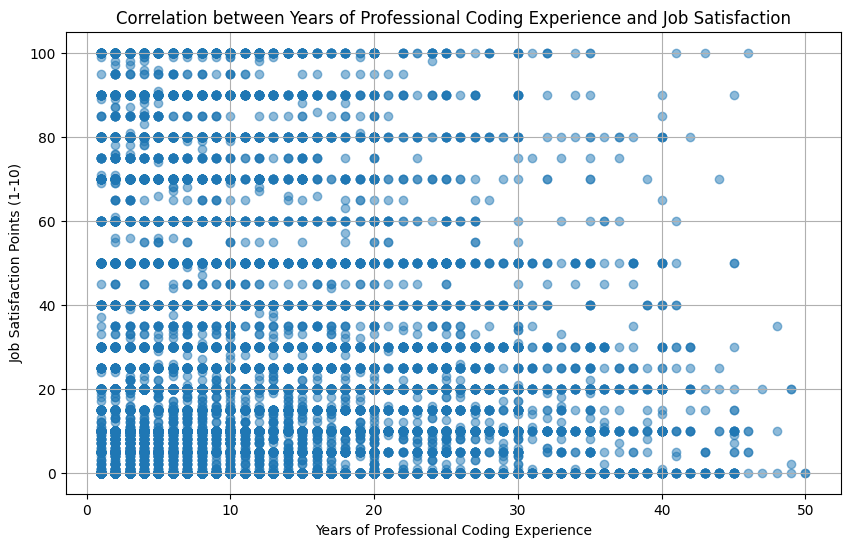

In [4]:
## Write your code here
# Examine how years of experience (YearsCodePro) correlate with job satisfaction (JobSatPoints_1). Use a scatter plot to visualize this relationship from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')

# Drop rows with missing values in the relevant columns
df_cleaned = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Convert YearsCodePro to numeric, coercing errors
df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')

# Drop rows where YearsCodePro conversion failed
df_cleaned = df_cleaned.dropna(subset=['YearsCodePro'])


# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['YearsCodePro'], df_cleaned['JobSatPoints_1'], alpha=0.5)
plt.title('Correlation between Years of Professional Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points (1-10)')
plt.grid(True)
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation of Educational Level and Employment Type:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       


/tmp/ipykernel_399/1061061459.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

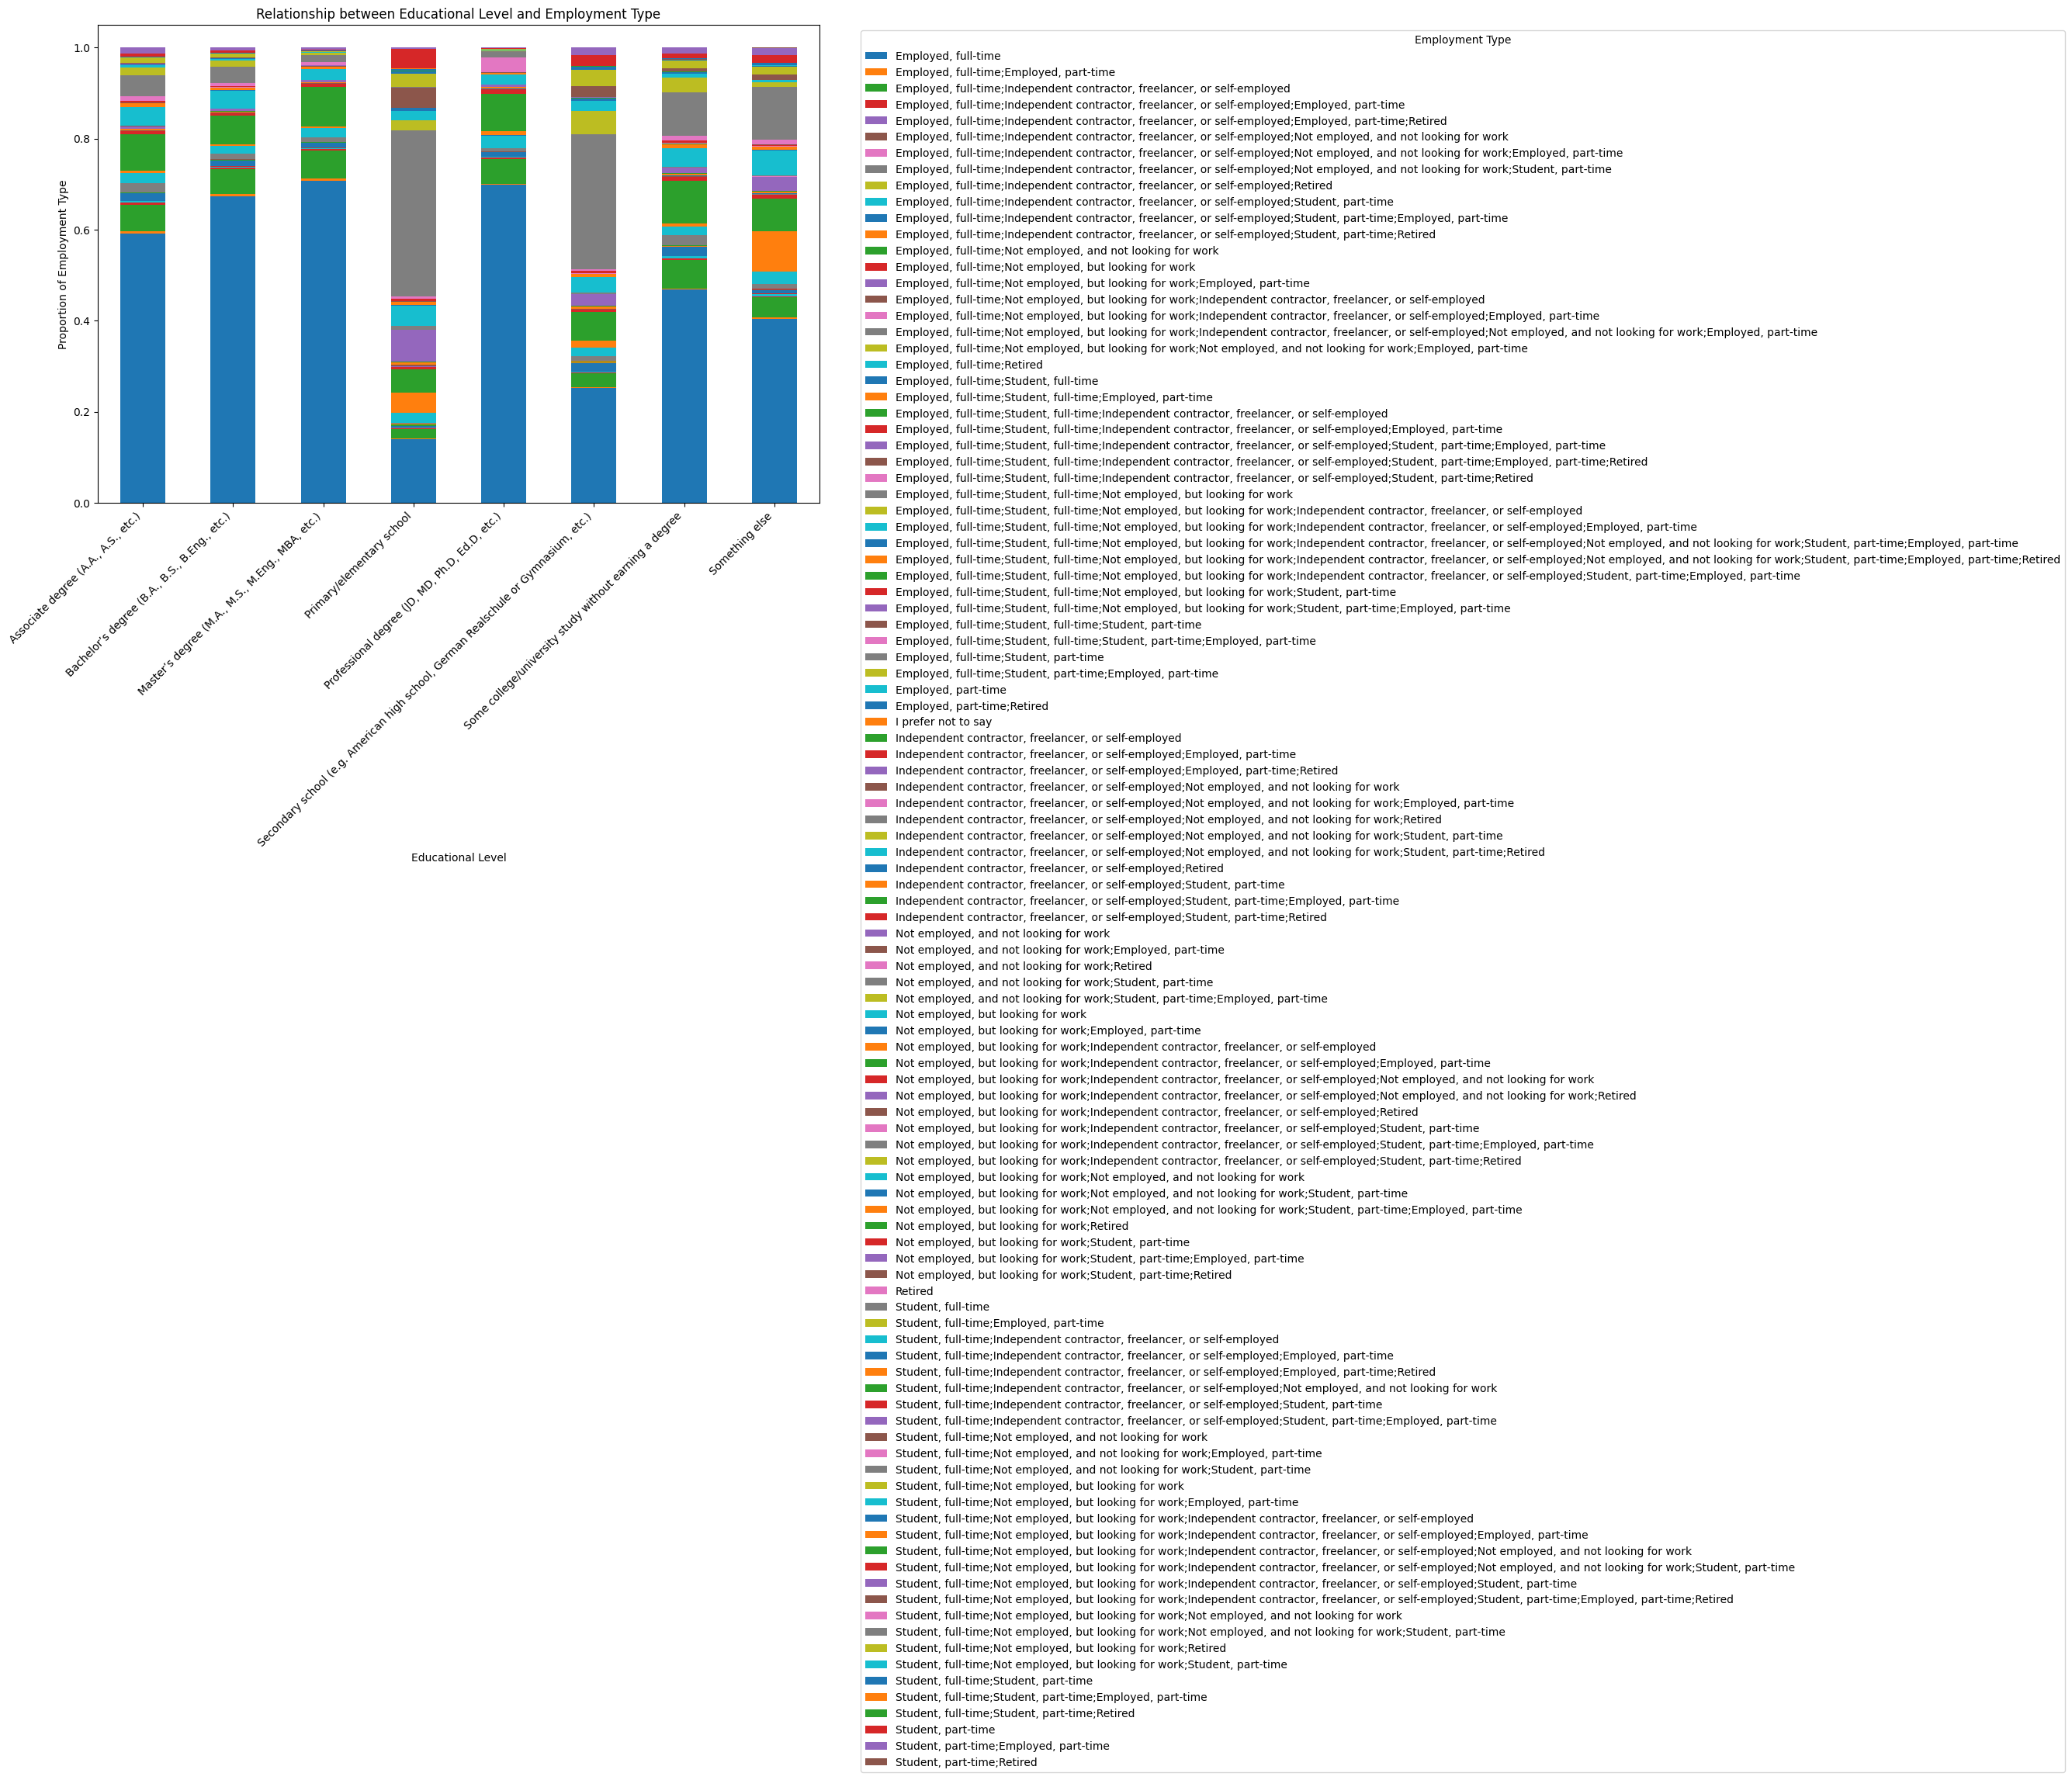

/tmp/ipykernel_399/1061061459.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


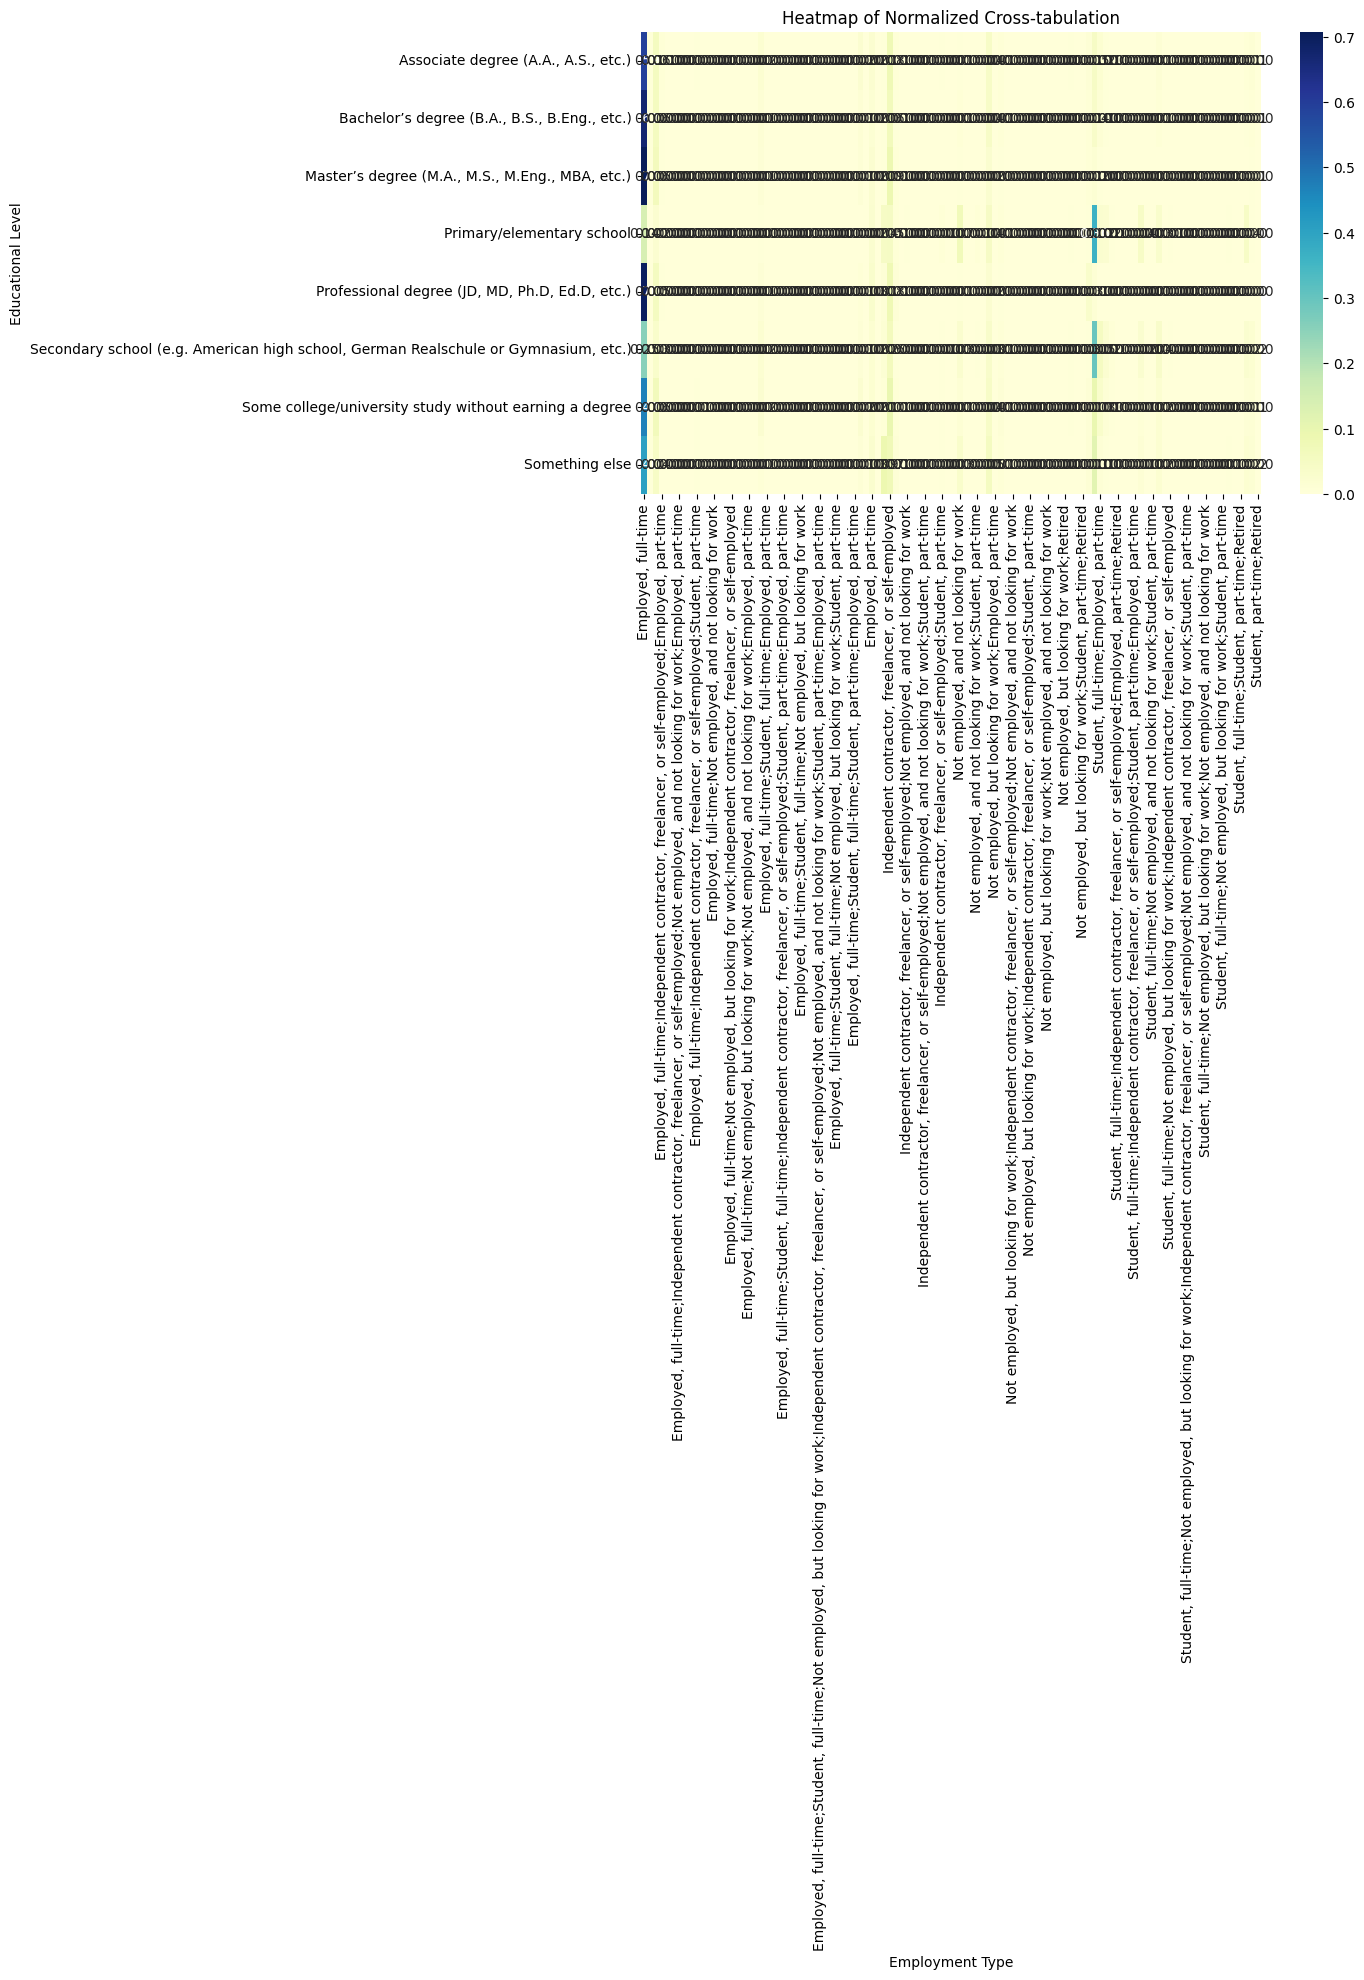

In [6]:
## Write your code here
# Explore how educational background (EdLevel) relates to employment type (Employment). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Create a cross-tabulation of EdLevel and Employment
crosstab_edlevel_employment = pd.crosstab(df['EdLevel'], df['Employment'])

# Display the cross-tabulation
print("Cross-tabulation of Educational Level and Employment Type:")
print(crosstab_edlevel_employment)

# Normalize the cross-tabulation to see proportions
crosstab_normalized = crosstab_edlevel_employment.div(crosstab_edlevel_employment.sum(axis=1), axis=0)

# Display the normalized cross-tabulation
print("\nNormalized Cross-tabulation (Proportions):")
print(crosstab_normalized)

# Visualize the relationship using a stacked bar chart
plt.figure(figsize=(12, 8))
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Relationship between Educational Level and Employment Type')
plt.xlabel('Educational Level')
plt.ylabel('Proportion of Employment Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Alternatively, use a heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_normalized, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Normalized Cross-tabulation')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [7]:
## Write your code here
# After your analysis, save the modified dataset for further use or sharing. from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

df.to_csv('modified_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
